# UNIVERSIDAD EXTERNADO DE COLOMBIA

## MAESTRIA INTELIGENCIA DE NEGOCIOS

### Liliana Hernandez
### Julieth Perea 
### Anjely Amazo

### TALLER Nro. 2 Seminario de programación

La fuente de nuestra base de datos la encontramos en el siguiente enlace:

https://www.datos.gov.co/es/Gastos-Gubernamentales/SECOP-II-Contratos-Electr-nicos/jbjy-vk9h/data

A continuación se muestran las librerias que usaremos para el analisis:

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
#instalar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import matplotlib.colors as colors
from ipywidgets import interact
from ipywidgets import Layout, AppLayout
from IPython.display import display
import functools
import time  #libreria que proporciona un conjunto de funciones para trabajar con fechas y/o horas.
import os
from colorama import init, Fore, Back, Style  #libreria que proporciohna color del texto y coloreado en la consola
import squarify    # pip install squarify (algorithm for treemap)
import scipy.stats as stats 

In [4]:
#Importamos archivo excel
Base= pd.read_excel('D:/MAESTRIA/MAESTRIA-JULIETHPEREA/2do Semestre/SECOPTALLER2.xlsx')

In [5]:
# Convert to pandas DataFrame
Base_df = pd.DataFrame.from_records(Base)
Base_df

,N,Nombre Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,Es Pyme,Valor del Contrato,Destino Gasto
0,1,FONDO UNICO DE TECNOLOGÍAS DE LA INFORMACIÓN Y...,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Tecnologías de la Información y las Comunicaci...,Ejecutivo,No Definido,Activo,Prestación de servicios,Contratación directa,2008-09-01 00:00:00,No,2.719200e+07,Inversión
1,1,SUBRED INTEGRADA DE SALUD CENTRO ORIENTE E.S.E,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,2008-10-01 00:00:00,Si,1.507479e+07,Funcionamiento
2,1,SECRETARÍA DISTRITAL DE MOVILIDAD,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Transporte,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2010-06-03 00:00:00,No,7.800000e+07,Inversión
3,1,AGENCIA NACIONAL DE TIERRAS,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,agricultura,Ejecutivo,Descentralizada,Borrador,Prestación de servicios,Contratación directa,2010-12-03 00:00:00,No,5.600000e+07,Inversión
4,1,DEPARTAMENTO DE ANTIOQUIA,Antioquia,Medellín,"Colombia, Antioquia , Medellín",Territorial,Servicio Público,Ejecutivo,No Definido,enviado Proveedor,Obra,Mínima cuantía,2015-05-11 00:00:00,Si,4.716755e+07,Inversión
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Borrador,Prestación de servicios,Contratación régimen especial,NaN,No,0.000000e+00,Funcionamiento
1048571,1,AGENCIA PÚBLICA DE EMPLEO DE CUNDINAMARCA,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Trabajo,Ejecutivo,Centralizada,Activo,Prestación de servicios,Contratación directa,NaN,No,1.560000e+07,Inversión
1048572,1,Empresa Nacional Promotora del Desarrollo Terr...,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Planeación,Corporación Autónoma,Centralizada,Activo,Otro,Contratación régimen especial,NaN,No,3.028112e+10,Inversión
1048573,1,INSTITUTO DISTRITAL DE RECREACIÓN Y DEPORTE,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Cultura,Ejecutivo,Descentralizada,Borrador,Prestación de servicios,Contratación directa,NaN,No,0.000000e+00,Inversión


In [6]:
display("Tipos de registros en el DataFrame",Base_df.dtypes)

'Tipos de registros en el DataFrame'

N                                 int64
Nombre Entidad                   object
Departamento                     object
Ciudad                           object
Localización                     object
Orden                            object
Sector                           object
Rama                             object
Entidad Centralizada             object
Estado Contrato                  object
Tipo de Contrato                 object
Modalidad de Contratacion        object
Fecha de Inicio del Contrato     object
Es Pyme                          object
Valor del Contrato              float64
Destino Gasto                    object
dtype: object

## Ejercicio 1

Hacer una exploracion por las siguientes variables que permita entender lo siguientes:
    ¿Que mide?
    ¿Que categorias admiten?
    ¿Como afecta el problema que nos compete?

###### (i)Orden
###### (ii)Rama
###### (iii)Sector
###### (iv)Departamento
###### (v)Tipo de Contrato
###### (vi)Estado Contrato 
###### (vii)Es Pyme

A continuacion, seleccionamos las variables de la base de datos que se van analizar:

In [7]:
Punto1= Base_df.loc[:,['Orden','Rama','Sector','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme']]
Punto1

,Orden,Rama,Sector,Departamento,Tipo de Contrato,Estado Contrato,Es Pyme
0,Nacional,Ejecutivo,Tecnologías de la Información y las Comunicaci...,Distrito Capital de Bogotá,Prestación de servicios,Activo,No
1,Territorial,Ejecutivo,Salud y Protección Social,Distrito Capital de Bogotá,Prestación de servicios,Modificado,Si
2,Territorial,Ejecutivo,Transporte,Distrito Capital de Bogotá,Prestación de servicios,Modificado,No
3,Nacional,Ejecutivo,agricultura,Distrito Capital de Bogotá,Prestación de servicios,Borrador,No
4,Territorial,Ejecutivo,Servicio Público,Antioquia,Obra,enviado Proveedor,Si
...,...,...,...,...,...,...,...
1048570,Territorial,Ejecutivo,Salud y Protección Social,Distrito Capital de Bogotá,Prestación de servicios,Borrador,No
1048571,Territorial,Ejecutivo,Trabajo,Distrito Capital de Bogotá,Prestación de servicios,Activo,No
1048572,Nacional,Corporación Autónoma,Planeación,Distrito Capital de Bogotá,Otro,Activo,No
1048573,Territorial,Ejecutivo,Cultura,Distrito Capital de Bogotá,Prestación de servicios,Borrador,No


##### Exploraciòn de cada variable:

#### (i) Orden

In [8]:
vb_orden= pd.DataFrame(Punto1['Orden'].value_counts(sort=True))
vb_orden

,Orden
Territorial,576532
Nacional,461263
Corporación Autónoma,10778
No Definido,2


De la información anterior, se presentan las gráficas de la variable orden:

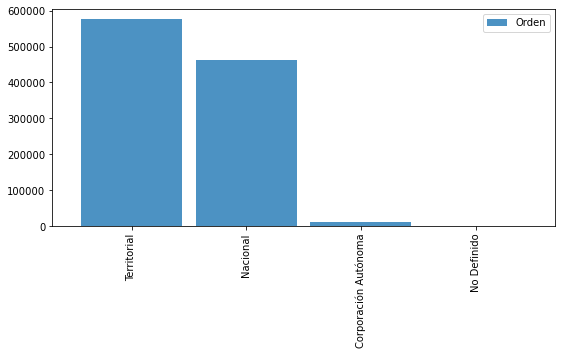

In [9]:
vb_orden.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.88,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

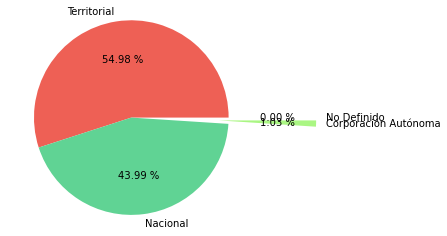

In [10]:
import matplotlib.pyplot as plt

valores = [576532, 461263, 10778,2]
nombres_orden = ["Territorial","Nacional","Corporación Autónoma","No Definido"]
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
desfase = (0, 0, 0.9, 0.9)
plt.pie(valores, labels=nombres_orden, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


De las gráficas anteriores, se evidenció que el 54,9% de los contrato electrónicos corresponden al orden territorial, seguido del orden nacional con el 43,9%, corporación autónoma con el 1,03% y no definido el 0,0001%.

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

De la variable orden, se evidenció que mide como se clasifican los contrato suscrito de acuerdo al orden Entidad que publica el contrato, respecto a las categorias se evidenció que se clasifican en el orden territorial, nacional, corporación autónoma y en los casos que no se encuentren definidas se denomina "no definido".
Por otra parte, es claro que más del 54% de la contratación corresponde al orden territorial que son los departamentos, los distritos, los municipios y los territorios indígenas.

#### (ii) Rama

In [11]:
vb_rama= pd.DataFrame(Punto1['Rama'].value_counts(sort=True))
vb_rama

,Rama
Ejecutivo,903134
Corporación Autónoma,126155
Judicial,12712
Legislativo,6572
No Definido,2


De la información anterior, se presentan las gráficas de la variable rama:

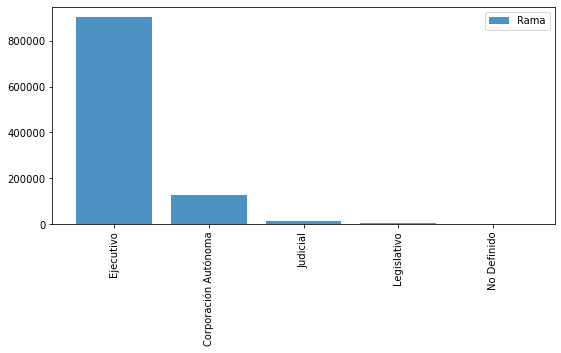

In [12]:
vb_rama.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

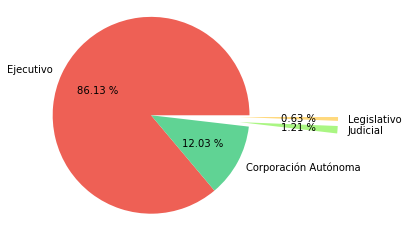

In [13]:
import matplotlib.pyplot as plt

valores = [903134, 126155, 12712, 6572]
nombres_rama = ["Ejecutivo","Corporación Autónoma", "Judicial", "Legislativo"]
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
desfase = (0, 0, 0.9, 0.9)
plt.pie(valores, labels=nombres_rama, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

De las gráficas anteriores, se evidenció que el 86,13% de los contratos electrónicos corresponden a la rama ejecutiva, seguido de la  corporación autónoma con el 12,03%, la rama judicial con el 1,21%, la rama legislativa con el 0,63% y en se encontró el 0,0001% de los contratos no definidos.

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

De la variable rama, se evidenció que mide la clasifica cada contrato suscrito por la rama del Estado, respecto a las categorias se evidenció que se clasifican en la rama ejecutiva, corporación autónoma, rama judicial y rama legislativa. 
Por otra parte, es claro que más del 86% de la contratación corresponde a la rama ejecutiva,que es la encargada de la administración pública, y del diseño y desarrollo de las políticas públicas, siendo estratégicamente una de las más importantes en el país.



#### (iii) Sector

In [14]:
vb_sector= pd.DataFrame(Punto1['Sector'].value_counts(sort=True))
vb_sector

,Sector
Servicio Público,196265
Salud y Protección Social,151468
No aplica/No pertenece,106574
defensa,88166
Trabajo,58343
Inclusión Social y Reconciliación,53764
Educación Nacional,49287
Ambiente y Desarrollo Sostenible,44449
Cultura,37702
Información Estadística,36387


De la información anterior, se presentan las gráficas de la variable sector:

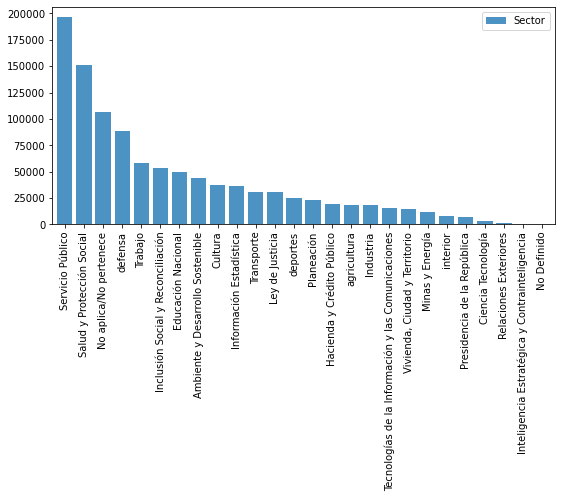

In [15]:
vb_sector.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

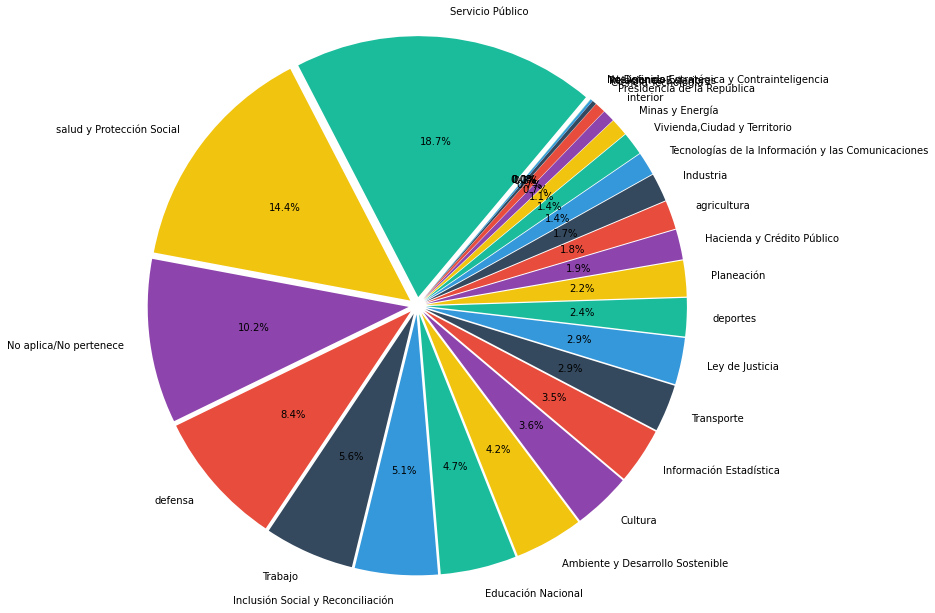

In [16]:
etiquetas = ["Servicio Público", "salud y Protección Social", "No aplica/No pertenece","defensa", "Trabajo", "Inclusión Social y Reconciliación",  "Educación Nacional", "Ambiente y Desarrollo Sostenible","Cultura", "Información Estadística", "Transporte", "Ley de Justicia", "deportes", "Planeación", "Hacienda y Crédito Público", "agricultura", "Industria", "Tecnologías de la Información y las Comunicaciones", "Vivienda,Ciudad y Territorio", "Minas y Energía", "interior", "Presidencia de la República", "Ciencia Tecnología", "Relaciones Exteriores", "Inteligencia Estratégica y Contrainteligencia", "No Definido"] 


porcentas = [196265, 151468, 106574 ,  88166 ,  58343 ,  53764 ,  49287 ,  44449 ,  37702 ,  36387 ,  30736 ,  30269 ,  24824 ,  23295 ,  19486 ,  18598 ,  18342 ,  15115 ,  14987 ,  11376 ,  7827,  6888 ,  2793 ,  1430 ,  202 ,  2 ]

colores = ['#1abc9c', '#f1c40f', '#8e44ad', '#e74c3c', '#34495e', '#3498db'] #LabelColor

plt.pie(porcentas, labels = etiquetas, colors=colores,
        startangle=50, explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        radius = 3, autopct = '%1.1f%%')

plt.show()

Se evidenció que se suscribieron los contratos para 26 sectores, de los cuales el 51% de los contratos suscritos corresponden a estos cuatro (4): al Servicio Público, seguido de Salud y Protección Social, algunos  No aplica/No pertenece y al sector defensa  y el 49% restante se encuentran en los otro 22 sectores anteriormente discriminados. 

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

De la variable sector, se evidenció que mide la clasificación cada contrato por sector, es decir, se admiten en la clasificación  26 sectores que se enunciaron anteriormente. Por otra parte, se considera que no hay afectación, toda vez que se evidencia que los contratos se encuentran distribuidos acorde a la obligación contractual de cada contrato, destacando que el 51% se encuentra en el sector de Servicio Público, seguido de Salud y Protección Social, algunos  No aplica/No pertenece y al sector defensa.

#### (iv) Departamento

In [17]:
vb_departamento= pd.DataFrame(Punto1['Departamento'].value_counts(sort=True))
vb_departamento

,Departamento
Distrito Capital de Bogotá,532189
Valle del Cauca,94533
Antioquia,63385
Santander,39743
Atlántico,29215
Tolima,24860
Cundinamarca,23674
Bolívar,22128
Risaralda,17564
Huila,16848


De la información anterior, se presentan las gráficas de la variable departamento:

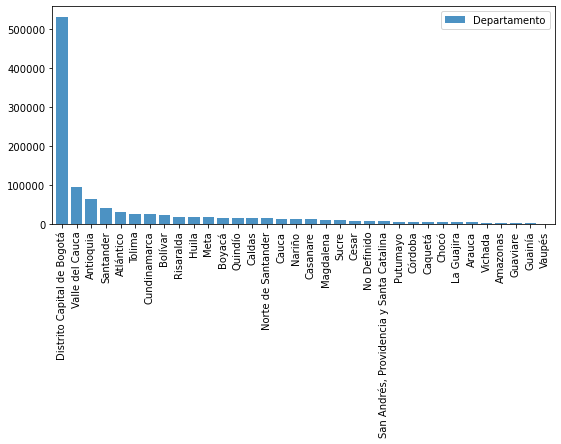

In [18]:
vb_departamento.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

De las gráficas anteriores, se evidenció que el 50% se suscribieron en la Distrito Capital de Bogotá, el 20% a los departamentos de Valle del Cauca, Antioquia, Santander y el 30% a los 30 Departamentos restantes y un 0,6% no se registró información.

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

La variable Departamento, presenta la información clasificada por cantidad de contratos suscritos por Departamento, en la categoría se admiten 32 departamentos y un distrito capital Bogotá. Por otra parte, se evidenció que el 50% de los contratos, es decir, 532.189 contratos se suscribieron en Bogotá..

#### (v) Tipo de Contrato

In [19]:
vb_tipocontrato=pd.DataFrame(Punto1['Tipo de Contrato'].value_counts(sort=True))
vb_tipocontrato

,Tipo de Contrato
Prestación de servicios,858743
Otro,47463
Compraventa,34902
Suministros,33816
DecreeLaw092/2017,27844
Obra,10541
Arrendamiento de inmuebles,9352
Interventoría,2884
Comodato,2736
Consultoría,2585


De la información anterior, se presentan las gráficas de la variable tipo de contrato:

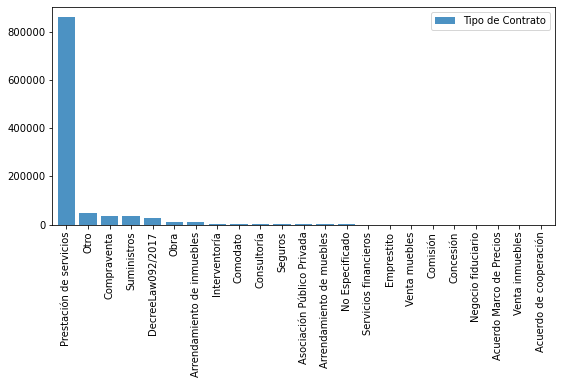

In [20]:
vb_tipocontrato.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

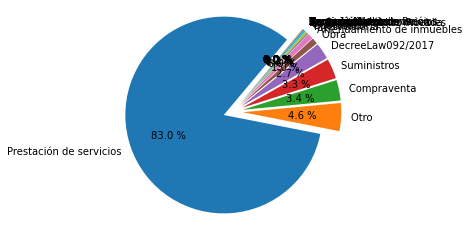

In [28]:
num= [858743,47463,34902,33816,27844,10541,9352,2884,2736,2585,1710,398,356,293,183,122,85,82,69,64,26,22,15]
nombres = ["Prestación de servicios","Otro ","Compraventa ", "Suministros ","DecreeLaw092/2017 ", "Obra ","Arrendamiento de inmuebles ","Interventoría ", "Comodato ","Consultoría ","Seguros ", "Asociación Público Privada ","Arrendamiento de muebles ","No Especificado ","Servicios financieros ","Emprestito ","Venta muebles ","Comisión ","Concesión ","Negocio fiduciario ","Acuerdo Marco de Precios ","Venta inmuebles ","Acuerdo de cooperación "]
plt.pie(num, labels=nombres, startangle=50, explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        radius = 1,autopct="%1.1f %%")
plt.axis("equal")
plt.show()

De las gráficas anteriores, se evidenció que se suscribieron 23 tipos de contratos, de los cuales el 90% corresponden a contratos de prestación de servicios, Otros y Compraventa.

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

•	De la variable tipo de contrato, la variable mide el tipo de contrato que se suscribió, se admiten 23 categorías en la clasificación, de los cuales el 90% corresponden a contratos de prestación de servicios, Otros y Compraventa y el 10% restante a las otras veinte categorías.  

#### (vi) Estado Contrato

In [24]:
vb_estadocontrato= pd.DataFrame(Punto1['Estado Contrato'].value_counts(sort=True))
vb_estadocontrato

,Estado Contrato
En ejecución,363774
Modificado,284415
Activo,181560
terminado,89810
Borrador,51887
Cerrado,42245
enviado Proveedor,16218
En aprobación,9130
cedido,8298
Suspendido,1114


De la información anterior, se presentan las gráficas de la variable estado del contrato:

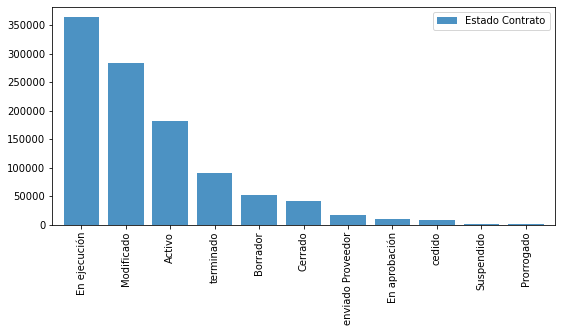

In [25]:
vb_estadocontrato.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

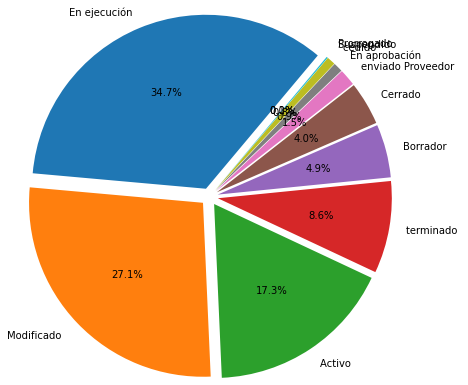

In [26]:
etiquetas = ['En ejecución', 'Modificado ', 'Activo ', 'terminado ', 'Borrador ', 'Cerrado ', 'enviado Proveedor ', 'En aprobación ', 'cedido ' ,'Suspendido ', 'Prorrogado '] 
porcentas = [363774,284415,181560,89810,51887,42245,16218,9130,8298,1114,115]

plt.pie(porcentas, labels = etiquetas,
        startangle=50, explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        radius = 2, autopct = '%1.1f%%')

plt.show()

De la gráfica anterior, se evidenció que el 34,7% de los contratos se encuentran en ejecución, seguido de los contratos modificados en 27,1%, activos el 17.4% entre otros. 

##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

De la variable estado del contrato, se logró evidenciar que mide el estado de cada contrato suscrito, donde admite 11 categorías que se clasifican en Activo, Borrador, cedido, Cerrado, En aprobación, En ejecución, enviado Proveedor, Modificado, Prorrogado, Suspendido y terminado. Ahora bien, respecto de si afecta el problema que compete, es impórtate resalta que la información arrojada es de gran utilidad, es decir, de la información se destaca que el  61% se encuentran  en ejecución y modificados.

#### (vii) Es Pyme

In [29]:
vb_espyme= pd.DataFrame(Punto1['Es Pyme'].value_counts(sort=True))
vb_espyme


,Es Pyme
No,849147
Si,185120


De la información anterior, se presentan las gráficas de la variable es pyme:

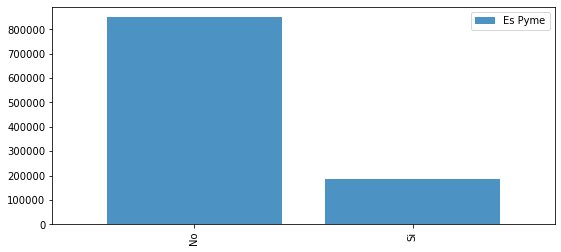

In [30]:
vb_espyme.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.8,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

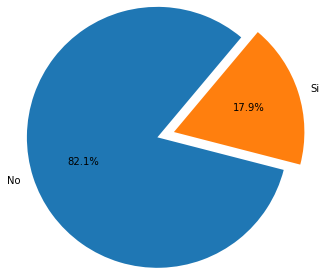

In [31]:
etiquetas = ['No','Si'] 
porcentas = [849147,185210]

plt.pie(porcentas, labels = etiquetas,
        startangle=50, explode = (0.1,0.1),
        radius = 1.5, autopct = '%1.1f%%')

plt.show()


##### ¿Qué miden?, ¿Qué categorías admiten? ¿Cómo afecta el problema que nos compete?

La variable Es Pyme, mide si los contratos se encuentras suscritos por una empresa Pyme. donde se admite si en el caso que se afirmativo y no cuando es lo contrario. En este sentido, el 82% de los contratos suscritos no son empresas Pyme como se evidencia en las gráficas anteriores. 

## Ejercicio 2

Crear un reporte (con un miniaplicativo incluido) que permita visualizar lo siguiente:


###### a) Cantidad de contratos por departamento segun sector y segun un rango de fechas que filtre con la fecha de inicio de contratos. Facilitar la consulta en regiones por año.


In [32]:
punto2a= Base_df.loc[:,['N','Sector','Departamento','Fecha de Inicio del Contrato']]
punto2a

,N,Sector,Departamento,Fecha de Inicio del Contrato
0,1,Tecnologías de la Información y las Comunicaci...,Distrito Capital de Bogotá,2008-09-01 00:00:00
1,1,Salud y Protección Social,Distrito Capital de Bogotá,2008-10-01 00:00:00
2,1,Transporte,Distrito Capital de Bogotá,2010-06-03 00:00:00
3,1,agricultura,Distrito Capital de Bogotá,2010-12-03 00:00:00
4,1,Servicio Público,Antioquia,2015-05-11 00:00:00
...,...,...,...,...
1048570,1,Salud y Protección Social,Distrito Capital de Bogotá,NaN
1048571,1,Trabajo,Distrito Capital de Bogotá,NaN
1048572,1,Planeación,Distrito Capital de Bogotá,NaN
1048573,1,Cultura,Distrito Capital de Bogotá,NaN


Presentamos la cantidad de contratos por Departamento de Colombia:

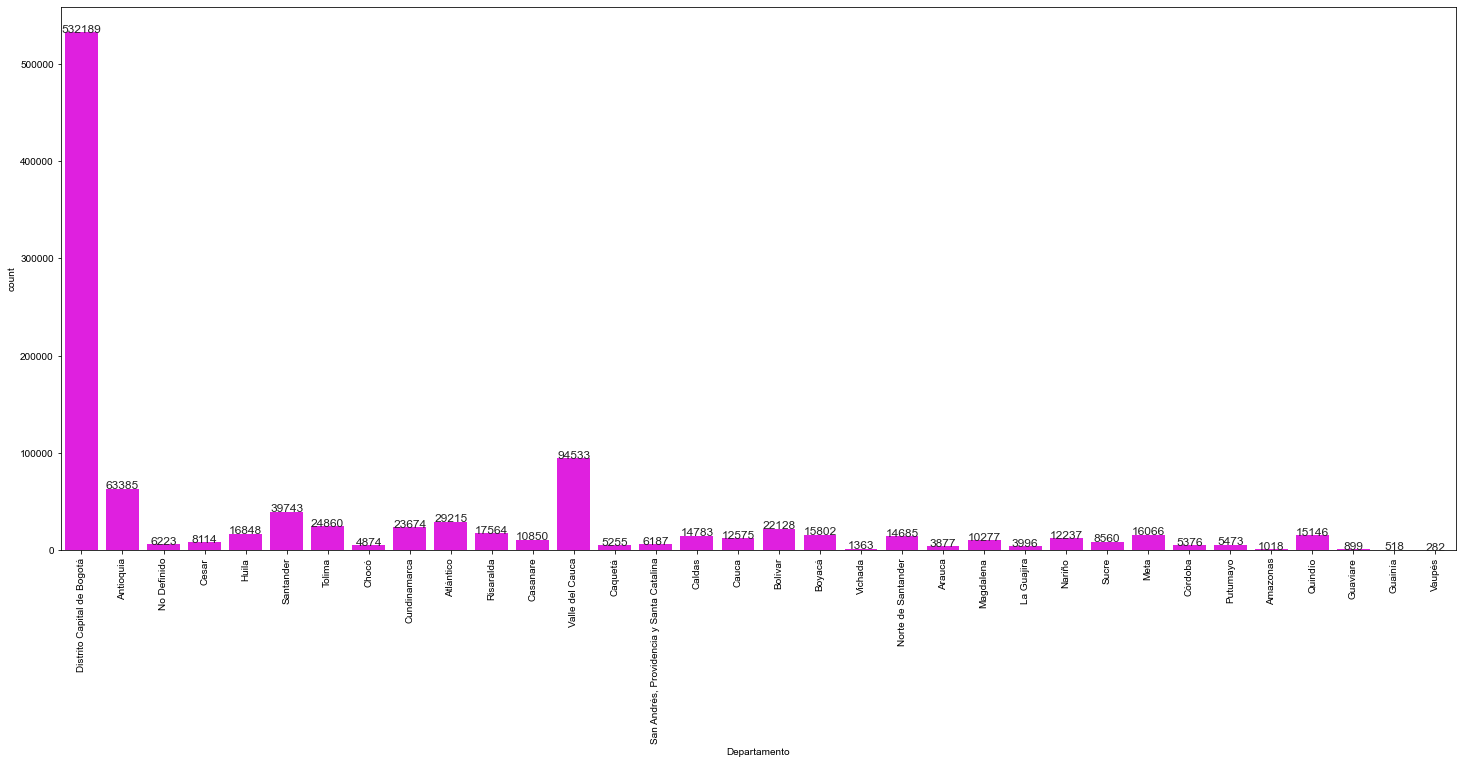

In [33]:
len(Base_df['Departamento'])
fig, ax= plt.subplots( figsize=(25,10))
plt.xticks(rotation=90, color='black',horizontalalignment="center")
ax = sns.countplot(x="Departamento", color = 'magenta', data=Base_df)
sns.set(rc={'figure.figsize':(3,8)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10,'{:0.0f}'.format((height)), ha="center")     

A continuación vamos a calcular la cantidad de contratos por departamento segun sector, rango de fechas y facilitar la consulta por Departamento y año:

-- ajustar variable "Fecha de inicio", para filtrar por año

In [34]:
punto2a['Fecha de Inicio del Contrato']=pd.to_datetime(punto2a['Fecha de Inicio del Contrato'], errors='coerce')  #Cómo convertir la columna del DataFrame a Datetime
punto2a['año']=punto2a['Fecha de Inicio del Contrato'].dt.to_period('y')
punto2a['año']=[str(i) for i in punto2a['año']] #Vb año en string 

De lo anterior, pasamos al miniaplicativo, que permita realiza la consulta de la siguiente manera:

https://stackoverflow.com/questions/65057860/how-to-return-a-pandas-dataframe-from-an-ipywidgets-output

In [35]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos
Periodo = widgets.Dropdown(description='Periodo', value='2008',
    options=punto2a['año'].unique().tolist())

Region = widgets.Dropdown(description='Region', value='Distrito Capital de Bogotá',
    options=punto2a['Departamento'].unique().tolist())

def Nro_contrato(Periodo,Region):
    x=punto2a[punto2a['año']== Periodo]
    x=x[x['Departamento']== Region]
    Nro= x['N'].sum()
        
    print('Para el año', Periodo, 'se registraron', Nro , 'contratos suscritos por la Región', Region)

interact(Nro_contrato, Periodo=Periodo, Region=Region)

Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Periodo', options=('2008', '2010', '2015', '2016', '2017', '2018',…

<function __main__.Nro_contrato(Periodo, Region)>

###### b) En el reporte anterior incluir la suma del Valor Total de contratos por sector y por region, tambien deben visualizarse los contratos que no posean fecha de inicio ¿Cuantos son?

In [36]:
punto2b= Base_df.loc[:,['N','Sector','Departamento','Valor del Contrato','Fecha de Inicio del Contrato']]
punto2b

,N,Sector,Departamento,Valor del Contrato,Fecha de Inicio del Contrato
0,1,Tecnologías de la Información y las Comunicaci...,Distrito Capital de Bogotá,2.719200e+07,2008-09-01 00:00:00
1,1,Salud y Protección Social,Distrito Capital de Bogotá,1.507479e+07,2008-10-01 00:00:00
2,1,Transporte,Distrito Capital de Bogotá,7.800000e+07,2010-06-03 00:00:00
3,1,agricultura,Distrito Capital de Bogotá,5.600000e+07,2010-12-03 00:00:00
4,1,Servicio Público,Antioquia,4.716755e+07,2015-05-11 00:00:00
...,...,...,...,...,...
1048570,1,Salud y Protección Social,Distrito Capital de Bogotá,0.000000e+00,NaN
1048571,1,Trabajo,Distrito Capital de Bogotá,1.560000e+07,NaN
1048572,1,Planeación,Distrito Capital de Bogotá,3.028112e+10,NaN
1048573,1,Cultura,Distrito Capital de Bogotá,0.000000e+00,NaN


In [37]:
punto2b['Fecha de Inicio del Contrato']=pd.to_datetime(punto2a['Fecha de Inicio del Contrato'], errors='coerce')  #Cómo convertir la columna del DataFrame a Datetime
punto2b['año']=punto2a['Fecha de Inicio del Contrato'].dt.to_period('y')
punto2b['año']=[str(i) for i in punto2a['año']] #Vb año en string 

De lo anterior, pasamos al miniaplicativo, que permita realiza la consulta de la siguiente manera:

In [38]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos

Periodo = widgets.Dropdown(description='Periodo', value='2008',
    options=punto2b['año'].unique().tolist())

Sector = widgets.Dropdown(description='Sector', value='Servicio Público',
    options=punto2b['Sector'].unique().tolist())

Region = widgets.Dropdown(description='Region', value='Distrito Capital de Bogotá',
    options=punto2b['Departamento'].unique().tolist())

def Nro_contrato(Periodo,Sector,Region):
    x=punto2b[punto2b['año']== Periodo]
    x=x[x['Departamento']== Region]
    x=x[x['Sector']== Sector]
    Nro= x['N'].sum()
    v= x['Valor del Contrato'].sum()
        
    print('Para el año', Periodo, 'se registraron', Nro , 'contratos suscritos  por la Región', Region, 'por un valor total de', v, 'para el sector', Sector)

interact(Nro_contrato, Periodo=Periodo, Sector=Sector, Region=Region)



Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Periodo', options=('2008', '2010', '2015', '2016', '2017', '2018',…

<function __main__.Nro_contrato(Periodo, Sector, Region)>

###### c) Permita excluir datos atıpicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor
    

A continuación, se excluiran los datos atipicos teniendo en cuenta la variable valor del contrato:

In [45]:
punto2c= Base_df.loc[:,['N','Sector','Departamento','Valor del Contrato','Fecha de Inicio del Contrato']]


In [46]:
# encontrar Q1, Q3 y rango intercuartílico para cada columna
Q1 = punto2c["Valor del Contrato"].quantile (q = .25)
Q3 = punto2c["Valor del Contrato"].quantile (q = .75)
#IQR = dataVlrContrato.apply (stats.iqr)
IQR=Q3-Q1

In [47]:
punto2c= Base_df.loc[:,['N','Sector','Departamento','Valor del Contrato','Fecha de Inicio del Contrato']]

conditionlist = [
    (punto2c['Valor del Contrato'].isnull()) ,
    (punto2c['Valor del Contrato'] <(Q1-1.5 * IQR)),
    (punto2c['Valor del Contrato'] >(Q3+1.5 * IQR))]
choicelist = ['Contrato sin Valor', 'Outlier Inferior', 'Outlier Superior']
punto2c['VlrCont'] = np.select(conditionlist, choicelist, default='Dato dentro de Rango')
punto2c

,N,Sector,Departamento,Valor del Contrato,Fecha de Inicio del Contrato,VlrCont
0,1,Tecnologías de la Información y las Comunicaci...,Distrito Capital de Bogotá,2.719200e+07,2008-09-01 00:00:00,Dato dentro de Rango
1,1,Salud y Protección Social,Distrito Capital de Bogotá,1.507479e+07,2008-10-01 00:00:00,Dato dentro de Rango
2,1,Transporte,Distrito Capital de Bogotá,7.800000e+07,2010-06-03 00:00:00,Dato dentro de Rango
3,1,agricultura,Distrito Capital de Bogotá,5.600000e+07,2010-12-03 00:00:00,Dato dentro de Rango
4,1,Servicio Público,Antioquia,4.716755e+07,2015-05-11 00:00:00,Dato dentro de Rango
...,...,...,...,...,...,...
1048570,1,Salud y Protección Social,Distrito Capital de Bogotá,0.000000e+00,NaN,Dato dentro de Rango
1048571,1,Trabajo,Distrito Capital de Bogotá,1.560000e+07,NaN,Dato dentro de Rango
1048572,1,Planeación,Distrito Capital de Bogotá,3.028112e+10,NaN,Outlier Superior
1048573,1,Cultura,Distrito Capital de Bogotá,0.000000e+00,NaN,Dato dentro de Rango


In [48]:
punto2c['Fecha de Inicio del Contrato']=pd.to_datetime(punto2c['Fecha de Inicio del Contrato'], errors='coerce')  #Cómo convertir la columna del DataFrame a Datetime
punto2c['año']=punto2c['Fecha de Inicio del Contrato'].dt.to_period('y')
punto2c['año']=[str(i) for i in punto2c['año']] #Vb año en string 

In [49]:
punto2c

,N,Sector,Departamento,Valor del Contrato,Fecha de Inicio del Contrato,VlrCont,año
0,1,Tecnologías de la Información y las Comunicaci...,Distrito Capital de Bogotá,2.719200e+07,2008-09-01,Dato dentro de Rango,2008
1,1,Salud y Protección Social,Distrito Capital de Bogotá,1.507479e+07,2008-10-01,Dato dentro de Rango,2008
2,1,Transporte,Distrito Capital de Bogotá,7.800000e+07,2010-06-03,Dato dentro de Rango,2010
3,1,agricultura,Distrito Capital de Bogotá,5.600000e+07,2010-12-03,Dato dentro de Rango,2010
4,1,Servicio Público,Antioquia,4.716755e+07,2015-05-11,Dato dentro de Rango,2015
...,...,...,...,...,...,...,...
1048570,1,Salud y Protección Social,Distrito Capital de Bogotá,0.000000e+00,NaT,Dato dentro de Rango,NaT
1048571,1,Trabajo,Distrito Capital de Bogotá,1.560000e+07,NaT,Dato dentro de Rango,NaT
1048572,1,Planeación,Distrito Capital de Bogotá,3.028112e+10,NaT,Outlier Superior,NaT
1048573,1,Cultura,Distrito Capital de Bogotá,0.000000e+00,NaT,Dato dentro de Rango,NaT


In [50]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos

Periodo = widgets.Dropdown(description='Periodo', value='2008',
    options=punto2c['año'].unique().tolist())

Sector = widgets.Dropdown(description='Sector', value='Servicio Público',
    options=punto2c['Sector'].unique().tolist())

Region = widgets.Dropdown(description='Region', value='Distrito Capital de Bogotá',
    options=punto2c['Departamento'].unique().tolist())

VlrCont = widgets.Dropdown(description='VlrCont', value='Dato dentro de Rango',
    options=punto2c['VlrCont'].unique().tolist())

def Nro_contrato(Periodo,Sector,Region,VlrCont):
    x=punto2c[punto2c['año']== Periodo]
    x=x[x['Departamento']== Region]
    x=x[x['Sector']== Sector]
    x=x[x['VlrCont']== VlrCont]
    Nro= x['N'].sum()
    v= x['Valor del Contrato'].sum()
        
    print('Para el año', Periodo, 'se registraron', Nro , 'contratos suscritos  por la Región', Region, 'por un valor total de', v, 'para el sector', Sector)

interact(Nro_contrato, Periodo=Periodo, Sector=Sector, Region=Region, VlrCont=VlrCont)


Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Periodo', options=('2008', '2010', '2015', '2016', '2017', '2018',…

<function __main__.Nro_contrato(Periodo, Sector, Region, VlrCont)>

## Ejercicio 3

Resuma la información obtenida en el anterior reporte con gráficos y tablas que considere pertinentes.
Justifique sus escogencias.

In [51]:
punto3= Base_df.loc[:,['N','Departamento','Tipo de Contrato','Tipo de Contrato','Valor del Contrato']]
punto3

,N,Departamento,Tipo de Contrato,Tipo de Contrato,Valor del Contrato
0,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,2.719200e+07
1,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,1.507479e+07
2,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,7.800000e+07
3,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,5.600000e+07
4,1,Antioquia,Obra,Obra,4.716755e+07
...,...,...,...,...,...
1048570,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,0.000000e+00
1048571,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,1.560000e+07
1048572,1,Distrito Capital de Bogotá,Otro,Otro,3.028112e+10
1048573,1,Distrito Capital de Bogotá,Prestación de servicios,Prestación de servicios,0.000000e+00


De la información analizada, se realizará un análisis de los Departamentos Valle del Cauca y Norte de Santander, debido a que el Departamento de Norte de Santander presenta 14.685 contratos suscritos alcanzando los  7.188.541.909.707.070 de  pesos, es decir, es el departamento seguido de Bogotá que mayor recursos estimo para la contratación, caso contrario con el Departamento del Valle del cauda que registró 94.533 siendo el segundo con la mayor cantidad de contratos suscritos con un total de   4.266.152.098.074.6190

Como nos arroja las siguientes consultas:

In [52]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos

Region = widgets.Dropdown(description='Region', value='Norte de Santander',
    options=Base_df['Departamento'].unique().tolist())


def contrato(Region):
    x=Base_df[Base_df['Departamento']== Region]
    Valor= x['Valor del Contrato'].sum()
    Nro3= x['N'].sum()
    
    
    print('Se registraron', Nro3 , 'contratos paara la Región', Region, ', por un total de', Valor, 'pesos')


interact(contrato, Region=Region)

Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Region', index=20, options=('Distrito Capital de Bogotá', 'Antioqu…

<function __main__.contrato(Region)>

Asimismo, se logró determinar que las contrataciones para el Departamento de Norte de Santander y Valle del Cauca se realizaron por lo siguiente: 

In [53]:
from tabulate import tabulate #Luego importamos la función tabular de la biblioteca tabular

table = [['Departamento', 'Nro Contratos', 'Valor Total Contrato'], ['Norte de Santander', '14685', 7188541909707070 ], ['Valle del Cauca', '94533', 4266152098074610]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════════╤═════════════════╤════════════════════════╕
│ Departamento       │   Nro Contratos │   Valor Total Contrato │
╞════════════════════╪═════════════════╪════════════════════════╡
│ Norte de Santander │           14685 │       7188541909707070 │
├────────────────────┼─────────────────┼────────────────────────┤
│ Valle del Cauca    │           94533 │       4266152098074610 │
╘════════════════════╧═════════════════╧════════════════════════╛


La siguiente gráfica presenta el porcentaje respecto del número de contratos del Departamento de Norte de Santander y Valle del Cauca:

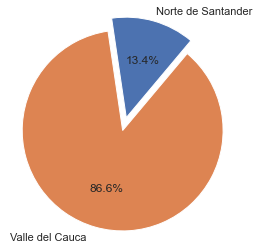

In [54]:
etiquetas = ['Norte de Santander',' Valle del Cauca  '] 
porcentas = [14685,94533]
plt.pie(porcentas, labels = etiquetas,
        startangle=50, explode = (0.1,0.1),
        radius = 1.5, autopct = '%1.1f%%')
plt.show()

Asimismo, se presenta el porcentaje respecto del valor total de los contratos del Departamento de Norte de Santander y Valle del Cauca:

([<matplotlib.patches.Wedge at 0x2331f3ff3a0>,
 [Text(-1.6731877083146036, 0.5127795752025672, 'Norte de Santander'),
  Text(1.6731877563244848, -0.5127794185474261, ' Valle del Cauca  ')],
 [Text(-0.956107261894059, 0.2930169001157527, '62.8%'),
  Text(0.956107289328277, -0.29301681059852924, '37.2%')])

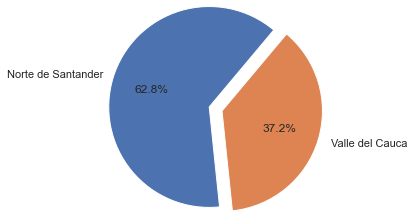

In [55]:
etiquetas = ['Norte de Santander',' Valle del Cauca  '] 
porcentas = [7188541909707070, 4266152098074610 ]
plt.pie(porcentas, labels = etiquetas,
        startangle=50, explode = (0.1,0.1),
        radius = 1.5, autopct = '%1.1f%%')

## Ejercicio 4

¿Cuáles son los sectores mas importantes de cada departamento? ¿Se ha mantenido esa tendencia en
cada año medido? Cree algunas métricas que identifiquen esa importancia (Cantidad de contratos,
porcentaje de inversión en el sector por departamento, etc...).

Los sectores mas importante de cada departamento son los siguientes:

In [56]:
punto4= Base_df.loc[:,['N','Departamento','Sector','Destino Gasto','Valor del Contrato','Fecha de Inicio del Contrato']]


In [57]:
vb_departamento= pd.DataFrame(punto4['Departamento'].value_counts(sort=True))
vb_departamento

,Departamento
Distrito Capital de Bogotá,532189
Valle del Cauca,94533
Antioquia,63385
Santander,39743
Atlántico,29215
Tolima,24860
Cundinamarca,23674
Bolívar,22128
Risaralda,17564
Huila,16848


Se detallará los cinco (5) Departamentos con el 72% de los contratos suscritos, así:

#### - Departamento - Distrito Capital de Bogotá

In [58]:
punto4.dtypes
punto4.value_counts('Departamento')
Departamento_Bogota =punto4[punto4['Departamento'] =='Distrito Capital de Bogotá']
Departamento_Bogota

,N,Departamento,Sector,Destino Gasto,Valor del Contrato,Fecha de Inicio del Contrato
0,1,Distrito Capital de Bogotá,Tecnologías de la Información y las Comunicaci...,Inversión,2.719200e+07,2008-09-01 00:00:00
1,1,Distrito Capital de Bogotá,Salud y Protección Social,Funcionamiento,1.507479e+07,2008-10-01 00:00:00
2,1,Distrito Capital de Bogotá,Transporte,Inversión,7.800000e+07,2010-06-03 00:00:00
3,1,Distrito Capital de Bogotá,agricultura,Inversión,5.600000e+07,2010-12-03 00:00:00
5,1,Distrito Capital de Bogotá,Planeación,Funcionamiento,7.327620e+05,2015-08-07 00:00:00
...,...,...,...,...,...,...
1048569,1,Distrito Capital de Bogotá,Información Estadística,Inversión,0.000000e+00,NaN
1048570,1,Distrito Capital de Bogotá,Salud y Protección Social,Funcionamiento,0.000000e+00,NaN
1048571,1,Distrito Capital de Bogotá,Trabajo,Inversión,1.560000e+07,NaN
1048572,1,Distrito Capital de Bogotá,Planeación,Inversión,3.028112e+10,NaN


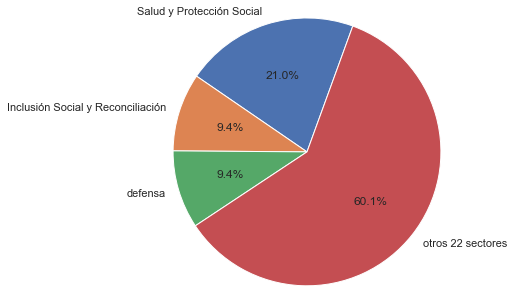

In [59]:
etiquetas = ["Salud y Protección Social","Inclusión Social y Reconciliación","defensa","otros 22 sectores" ] 
porcentas = [111713, 50264,50184,320028]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=70, autopct = '%1.1f%%')
plt.show()


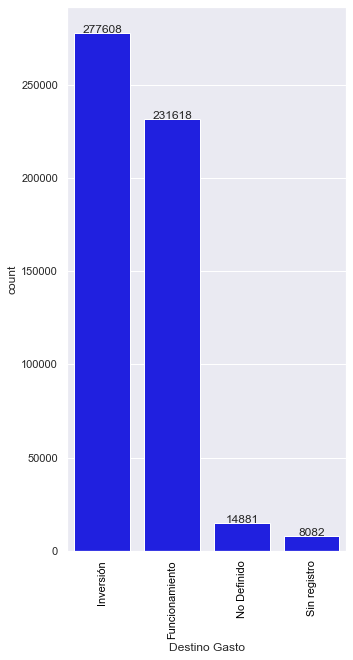

In [60]:
len(Departamento_Bogota['Destino Gasto'])
fig, ax= plt.subplots( figsize=(5,10))
plt.xticks(rotation=90,color='black',horizontalalignment="center")
ax = sns.countplot(x="Destino Gasto", color = 'blue', data=Departamento_Bogota)
sns.set(rc={'figure.figsize':(3,9)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height ,'{:0.0f}'.format((height)), ha="center")     

La Ciudad de Bogotá suscribió 532.189 contratos, donde se evidenció que los tres (3) sectores más representativos con el 40% de participación son el sector de Salud y Protección Social, Inclusión Social y Reconciliación y defensa.

Por otra parte, los contratos suscritos en Bogotá se registraron el 52% se destinaron para inversión, es decir, 277.608 contratos.
Nota: 8.082 contratos no registraron el destino del gasto.

#### -Departamento Valle del Cauca

In [61]:
punto4.dtypes
punto4.value_counts('Departamento')
Departamento_Valle =punto4[punto4['Departamento'] =='Valle del Cauca']
Departamento_Valle

,N,Departamento,Sector,Destino Gasto,Valor del Contrato,Fecha de Inicio del Contrato
1431,1,Valle del Cauca,Servicio Público,Inversión,385868941.0,2017-01-08 00:00:00
1583,1,Valle del Cauca,defensa,No Definido,6312000.0,2017-01-09 00:00:00
1710,1,Valle del Cauca,defensa,Funcionamiento,6622186.0,2017-01-10 00:00:00
1713,1,Valle del Cauca,defensa,Funcionamiento,9704225.0,2017-01-10 00:00:00
1715,1,Valle del Cauca,defensa,Funcionamiento,14960000.0,2017-01-10 00:00:00
...,...,...,...,...,...,...
1048514,1,Valle del Cauca,Salud y Protección Social,Funcionamiento,0.0,NaN
1048525,1,Valle del Cauca,deportes,Inversión,3551200.0,NaN
1048547,1,Valle del Cauca,Hacienda y Crédito Público,Funcionamiento,14580000.0,NaN
1048556,1,Valle del Cauca,Servicio Público,Funcionamiento,0.0,NaN


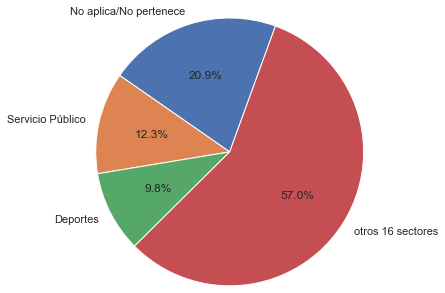

In [62]:
etiquetas = ["No aplica/No pertenece","Servicio Público","Deportes","otros 16 sectores"] 
porcentas = [19748,11605,9279,53901]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=70, autopct = '%1.1f%%')
plt.show()


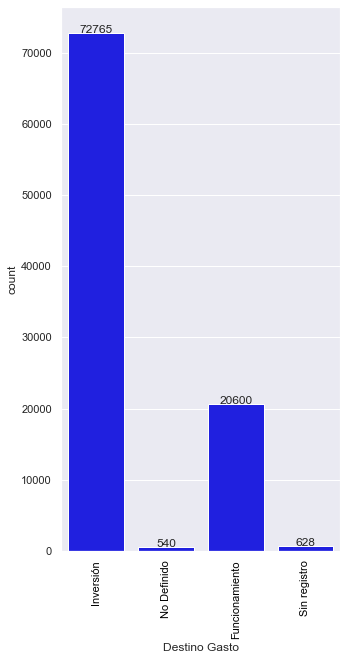

In [63]:
len(Departamento_Valle['Destino Gasto'])
fig, ax= plt.subplots( figsize=(5,10))
plt.xticks(rotation=90,color='black',horizontalalignment="center")
ax = sns.countplot(x="Destino Gasto", color = 'blue', data=Departamento_Valle)
sns.set(rc={'figure.figsize':(3,9)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height ,'{:0.0f}'.format((height)), ha="center")     

El Departamento del Valle del Cauca suscribió 94.533 contratos, donde se evidenció que los tres (3) sectores más representativos con el 43%, se registraron en  No aplica/No pertenece, Servicio Público y deportes. 

Por otra parte, los contratos suscritos en el Valle del Cauca se registraron el 77% se destinaron para inversión, es decir, 72.765.
Nota: 628 contratos no registraron el destino del gasto.

#### -Departamento Antioquia

In [64]:
punto4.dtypes
punto4.value_counts('Departamento')
Departamento_Antioquia =punto4[punto4['Departamento'] =='Antioquia']
Departamento_Antioquia

,N,Departamento,Sector,Destino Gasto,Valor del Contrato,Fecha de Inicio del Contrato
4,1,Antioquia,Servicio Público,Inversión,4.716755e+07,2015-05-11 00:00:00
17,1,Antioquia,Educación Nacional,Funcionamiento,9.137397e+09,2016-01-04 00:00:00
607,1,Antioquia,Servicio Público,Funcionamiento,4.957704e+07,2016-07-10 00:00:00
733,1,Antioquia,Servicio Público,Funcionamiento,3.360281e+07,2016-09-09 00:00:00
1384,1,Antioquia,Transporte,Funcionamiento,2.020000e+06,2017-01-06 00:00:00
...,...,...,...,...,...,...
1048532,1,Antioquia,Servicio Público,Inversión,5.058182e+07,NaN
1048533,1,Antioquia,deportes,Inversión,0.000000e+00,NaN
1048546,1,Antioquia,Salud y Protección Social,Funcionamiento,6.500000e+07,NaN
1048558,1,Antioquia,Ley de Justicia,Funcionamiento,7.250863e+06,NaN


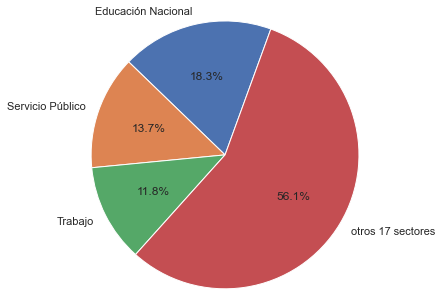

In [65]:
etiquetas = ["Educación Nacional","Servicio Público","Trabajo","otros 17 sectores"] 
porcentas = [11624,8715,7494,35552]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=70, autopct = '%1.1f%%')
plt.show()


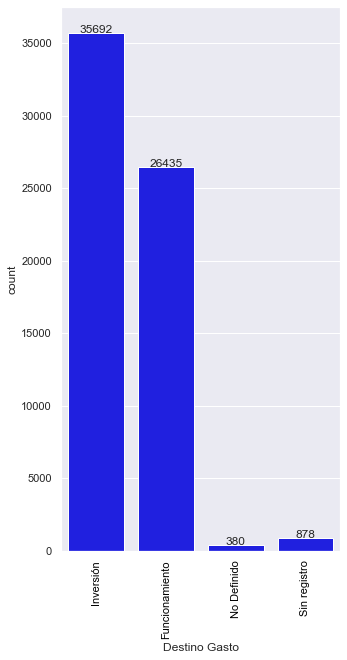

In [66]:
len(Departamento_Antioquia['Destino Gasto'])
fig, ax= plt.subplots( figsize=(5,10))
plt.xticks(rotation=90,color='black',horizontalalignment="center")
ax = sns.countplot(x="Destino Gasto", color = 'blue', data=Departamento_Antioquia)
sns.set(rc={'figure.figsize':(3,9)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height ,'{:0.0f}'.format((height)), ha="center")     

El Departamento de Antioquia suscribió 63.385 contratos, donde se evidenció que los tres (3) sectores más representativos con el 44% son Educación Nacional, Servicio Público y Trabajo. 

Por otra parte, los contratos suscritos en Antioquia se registraron el 56% se destinaron para inversión, es decir, 35.692
Nota: 878 contratos no registraron el destino del gasto.


#### - Departamento Santander

In [67]:
punto4.dtypes
punto4.value_counts('Departamento')
Departamento_Santander =punto4[punto4['Departamento'] =='Santander']
Departamento_Santander

,N,Departamento,Sector,Destino Gasto,Valor del Contrato,Fecha de Inicio del Contrato
810,1,Santander,No aplica/No pertenece,Funcionamiento,1.233000e+07,2016-11-03 00:00:00
1076,1,Santander,Servicio Público,Funcionamiento,1.500000e+07,2017-01-02 00:00:00
1085,1,Santander,Servicio Público,Inversión,1.500000e+07,2017-01-02 00:00:00
1107,1,Santander,Servicio Público,Inversión,1.000000e+07,2017-01-02 00:00:00
1115,1,Santander,Servicio Público,Inversión,1.800000e+07,2017-01-02 00:00:00
...,...,...,...,...,...,...
1048463,1,Santander,Servicio Público,Inversión,1.288800e+09,NaN
1048470,1,Santander,Servicio Público,Inversión,1.750000e+07,NaN
1048541,1,Santander,defensa,Funcionamiento,3.843840e+07,NaN
1048554,1,Santander,Salud y Protección Social,Funcionamiento,2.200000e+06,NaN


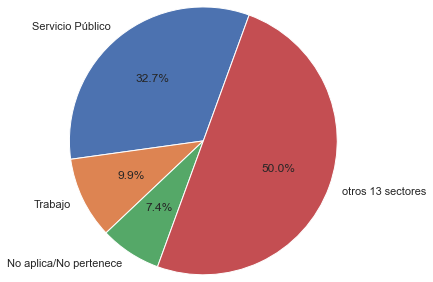

In [68]:
etiquetas = ["Servicio Público","Trabajo","No aplica/No pertenece","otros 13 sectores"] 
porcentas = [17161,5168,3872,26201]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=70, autopct = '%1.1f%%')
plt.show()


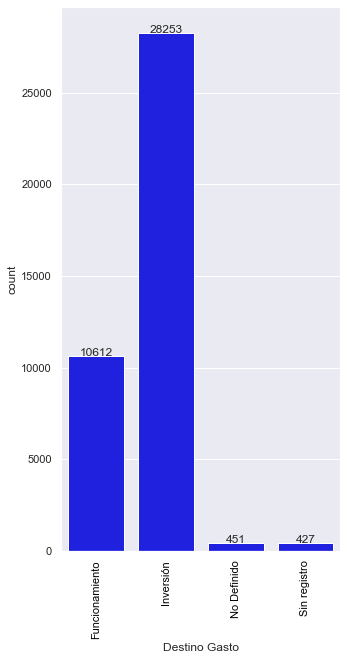

In [69]:
len(Departamento_Santander['Destino Gasto'])
fig, ax= plt.subplots( figsize=(5,10))
plt.xticks(rotation=90,color='black',horizontalalignment="center")
ax = sns.countplot(x="Destino Gasto", color = 'blue', data=Departamento_Santander)
sns.set(rc={'figure.figsize':(3,9)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height ,'{:0.0f}'.format((height)), ha="center")    

El Departamento de Santander suscribió 39.743 contratos, donde se evidenció que los tres (3) sectores más representativos con el 66% son Educación Nacional, Servicio Público y Trabajo. 

Por otra parte, los contratos suscritos en Santander se registraron el 71% se destinaron para inversión, es decir, 28.2532
Nota: 427 contratos no registraron el destino del gasto.

#### - Departamento Atlántico

In [70]:
punto4.dtypes
punto4.value_counts('Departamento')
Departamento_Atlántico =punto4[punto4['Departamento'] =='Atlántico']
Departamento_Atlántico

,N,Departamento,Sector,Destino Gasto,Valor del Contrato,Fecha de Inicio del Contrato
1289,1,Atlántico,defensa,Funcionamiento,338045633.0,2017-01-04 00:00:00
2118,1,Atlántico,defensa,Funcionamiento,5776437.0,2017-01-12 00:00:00
2399,1,Atlántico,defensa,Funcionamiento,2766780.0,2017-01-12 00:00:00
2889,1,Atlántico,Servicio Público,Inversión,33886559.0,2017-02-10 00:00:00
2894,1,Atlántico,defensa,Funcionamiento,5000000.0,2017-02-10 00:00:00
...,...,...,...,...,...,...
1048368,1,Atlántico,Transporte,Inversión,39680189.0,NaN
1048399,1,Atlántico,Información Estadística,Sin registro,NaN,NaN
1048498,1,Atlántico,Información Estadística,Sin registro,NaN,NaN
1048537,1,Atlántico,Servicio Público,Funcionamiento,3500000.0,NaN


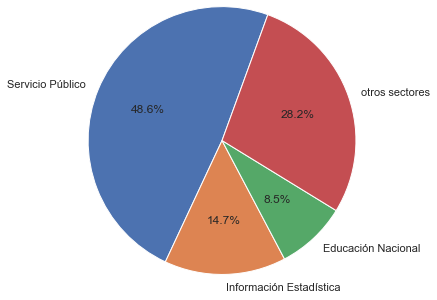

In [71]:
etiquetas = ["Servicio Público","Información Estadística","Educación Nacional", "otros sectores"] 
porcentas = [14199,4289,2488,8239]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=70, autopct = '%1.1f%%')
plt.show()


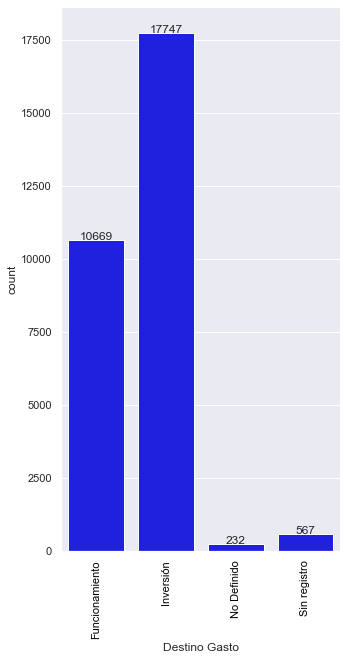

In [72]:
len(Departamento_Atlántico['Destino Gasto'])
fig, ax= plt.subplots( figsize=(5,10))
plt.xticks(rotation=90,color='black',horizontalalignment="center")
ax = sns.countplot(x="Destino Gasto", color = 'blue', data=Departamento_Atlántico)
sns.set(rc={'figure.figsize':(3,9)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height ,'{:0.0f}'.format((height)), ha="center")    

El Departamento de Santander suscribió 39.743 contratos, donde se evidenció que los tres (3) sectores más representativos con el 66% son Educación Nacional, Servicio Público y Trabajo. 

Por otra parte, los contratos suscritos en Santander se registraron el 60% se destinaron para inversión, es decir, 17.747
Nota: 567 contratos no registraron el destino del gasto.

## Ejercicio 5

Incluya lo anterior en el mini aplicativo del Ejercicio 2.

In [73]:
punto4['Fecha de Inicio del Contrato']=pd.to_datetime(punto4['Fecha de Inicio del Contrato'], errors='coerce')  #Cómo convertir la columna del DataFrame a Datetime
punto4['año']=punto4['Fecha de Inicio del Contrato'].dt.to_period('y')
punto4['año']=[str(i) for i in punto4['año']] #Vb año en string 

In [74]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos
Periodo = widgets.Dropdown(description='Periodo', value='2008',
    options=punto4['año'].unique().tolist())

Region = widgets.Dropdown(description='Region', value='Distrito Capital de Bogotá',
    options=punto4['Departamento'].unique().tolist())

Gasto = widgets.Dropdown(description='Gasto', value='Inversión',
    options=punto4['Destino Gasto'].unique().tolist())

Sector = widgets.Dropdown(description='Sector', value='Cultura',
    options=punto4['Sector'].unique().tolist())

def Nro_contrato(Periodo, Region, Gasto, Sector):
    x=punto4[punto4['año']== Periodo]
    x=x[x['Departamento']== Region]
    x=x[x['Destino Gasto']== Gasto]
    x=x[x['Sector']== Sector]
    Nro= x['N'].sum()
    v= x['Valor del Contrato'].sum()
    y= x['Sector']
        
    print('Para el año', Periodo, 'se registró', Nro , 'contrato(s) sucrito(s)  por la Región', Region, 'y con destino a un gasto de', Gasto)

interact(Nro_contrato, Periodo=Periodo, Region=Region, Gasto=Gasto, Sector=Sector)



Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Periodo', options=('2008', '2010', '2015', '2016', '2017', '2018',…

<function __main__.Nro_contrato(Periodo, Region, Gasto, Sector)>

Otro miniaplicativo, detallando la consulta por sector:

In [75]:
# construcción filtro y consulta en el miniaplicativo
print(Style.BRIGHT+Fore.BLUE+"Bienvenidos al aplicativo de consulta") 
time.sleep(1)  #tiempo de 2 segundos para ejecutar la siguiente linea
print('                   ') #separa los parrafos
Periodo = widgets.Dropdown(description='Periodo', value='2008',
    options=punto4['año'].unique().tolist())

Region = widgets.Dropdown(description='Region', value='Distrito Capital de Bogotá',
    options=punto4['Departamento'].unique().tolist())

Gasto = widgets.Dropdown(description='Gasto', value='Inversión',
    options=punto4['Destino Gasto'].unique().tolist())


def Nro_contrato(Periodo, Region, Gasto):
    x=punto4[punto4['año']== Periodo]
    x=x[x['Departamento']== Region]
    x=x[x['Destino Gasto']== Gasto]
    Nro= x['N'].sum()
    v= x['Valor del Contrato'].sum()
    y= x['Sector']
        
    print('Para el año', Periodo, 'se registró', Nro , 'contrato(s) sucrito(s)  por la Región', Region, 'y con destino a un gasto de', Gasto, '. Para los siguientes sectores:'
         '                                                                                       ',
         '                                                                                       ',
          y)

interact(Nro_contrato, Periodo=Periodo, Region=Region, Gasto=Gasto)



Bienvenidos al aplicativo de consulta
                   


interactive(children=(Dropdown(description='Periodo', options=('2008', '2010', '2015', '2016', '2017', '2018',…

<function __main__.Nro_contrato(Periodo, Region, Gasto)>